# Student Grade Regression - Portuguese

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df)
df = pd.read_csv('student-por.csv')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [7]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(649, 32) (649,)


## 3. Visualize Data

#### **Visualization Labels**

In [9]:
# Gender: Male or Female
gender_labels = ['F - Female', 'M - Male']
# Number of Failures
failure_labels = ['0 failures', '1 failure', '2 failures', '3 failures']

#### Age Distribution

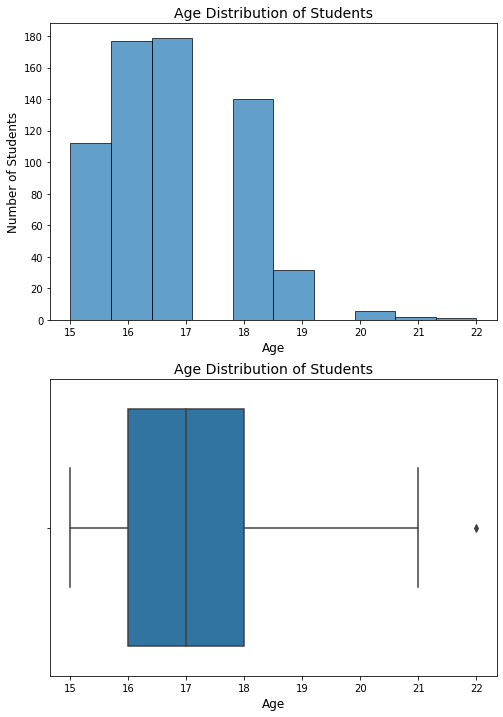

In [10]:
# Define subplot
age_dist = plt.figure(figsize=(8, 12))

# Age distribution histogram
ax1 = age_dist.add_subplot(2, 1, 1)
ax1 = plt.hist(x=df['age'], alpha=0.7, edgecolor='black')
# Adjust Y-Axis range
plt.yticks(np.arange(0, 200, 20))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)

# Age distribution box plot
ax2 = age_dist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['age'])
# Adjust Y-Axis range
plt.xticks(np.arange(15, 23, 1))
# Plot title and label
plt.xlabel('Age', fontsize=12)
plt.title('Age Distribution of Students', fontsize=14)

# Show subplot
plt.show()

#### Gender Distribution

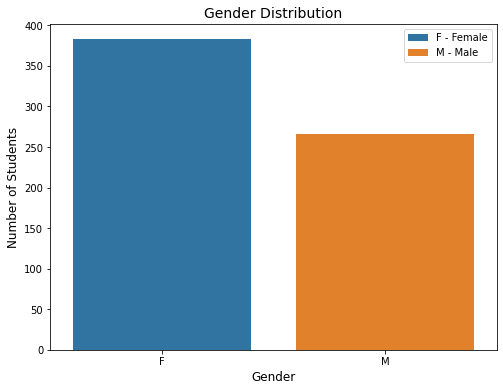

In [11]:
# Define figure
gender_dist = plt.figure(figsize=(8, 6))

# Gender distribution
gender_dist = sns.countplot(x=df['sex'], hue=df['sex'], dodge=False)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 450, 50))
# Plot title and labels
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Gender Distribution', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Show figure
plt.show()

#### Extracurricular Activities

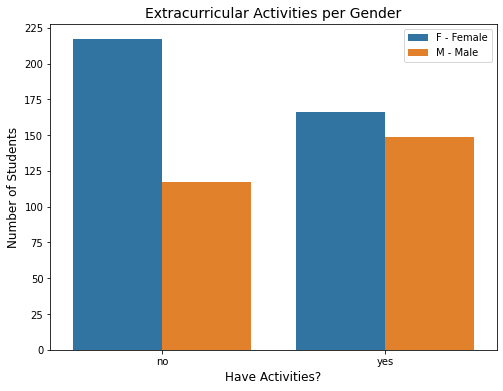

In [12]:
# Define figure
ea_dist = plt.figure(figsize=(8, 6))

# Extracurricular Activities distribution
ea_dist = sns.countplot(x=df['activities'], hue=df['sex'], dodge=True)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 250, 25))
# Plot title and labels
plt.xlabel('Have Activities?', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Extracurricular Activities per Gender', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Show figure
plt.show()

#### Travel Time from Home to School

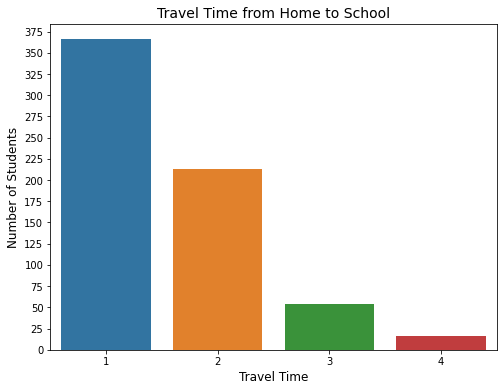

In [13]:
# Define figure
travel_time = plt.figure(figsize=(8, 6))

# Travel Time distribution
travel_time = sns.countplot(x=df['traveltime'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 400, 25))
# Plot title and labels
plt.xlabel('Travel Time', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Travel Time from Home to School', fontsize=14)

# Show figure
plt.show()

##### **Travel Time:**

- **1:** <15 minutes
- **2:** 15-30 minutes
- **3:** 30 minutes - 1 hour
- **4:** >1 hour

#### Weekly Studying Time 

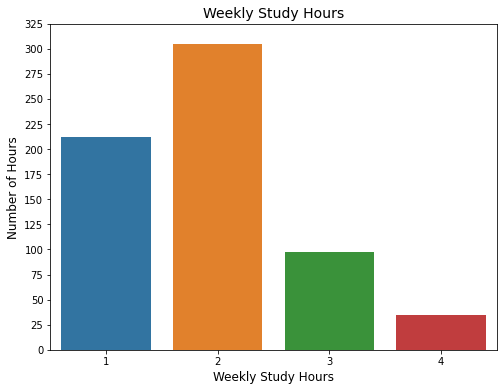

In [14]:
# Define figure
weekly_study_time = plt.figure(figsize=(8, 6))

# Weekly Study Time distribution
weekly_study_time = sns.countplot(x=df['studytime'], dodge=True)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 350, 25))
# Plot title and labels
plt.xlabel('Weekly Study Hours', fontsize=12)
plt.ylabel('Number of Hours', fontsize=12)
plt.title('Weekly Study Hours', fontsize=14)

# Show figure
plt.show()

##### **Weekly Study Hours:**

- **1:** <2 hours
- **2:** 2-5 hours
- **3:** 5-10 hours
- **4:** >10 hours

#### Average Number of Absences per Age

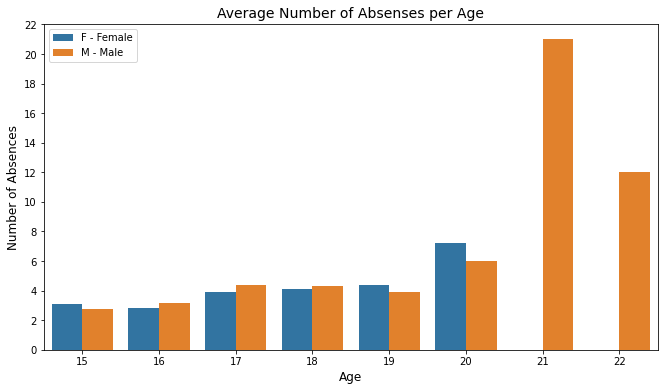

In [15]:
# Define figure
plt.figure(figsize=(11, 6))

# Average Number of Absences distribution
sns.barplot(x=df['age'], y=df['absences'], hue=df['sex'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 24, 2))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Average Number of Absenses per Age', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper left')

# Show figure
plt.show()

#### Number of Absences Percentile Distribution

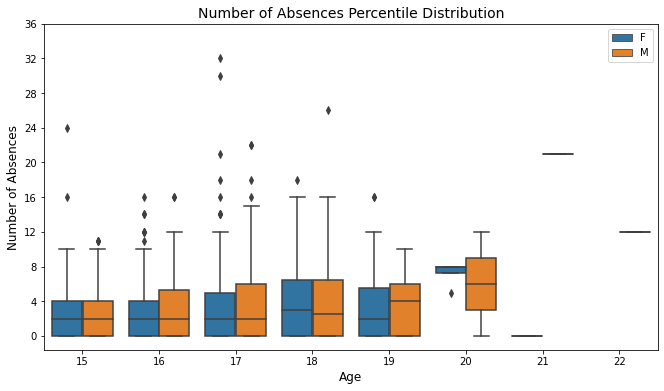

In [16]:
# Define figure
plt.figure(figsize=(11, 6))

# Number of Absences Percentile Distribution (box plot)
sns.boxplot(x=df['age'], y=df['absences'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 4))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Number of Absences Percentile Distribution', fontsize=14)
# Plot legend
plt.legend(loc='upper right')

# Show figure
plt.show()

#### Number of Failures per Age

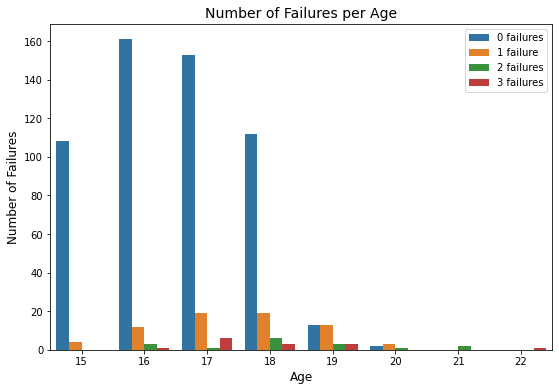

In [17]:
# Define figure
plt.figure(figsize=(9, 6))

# Number of failure rates per age
sns.countplot(x=df['age'], hue=df['failures'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 180, 20))
# Plot title and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Failures', fontsize=12)
plt.title('Number of Failures per Age', fontsize=14)
# Plot legend
plt.legend(labels=failure_labels, loc='upper right')

# Show figure
plt.show()

#### Pairwise Relationships Between Absenses and Grades

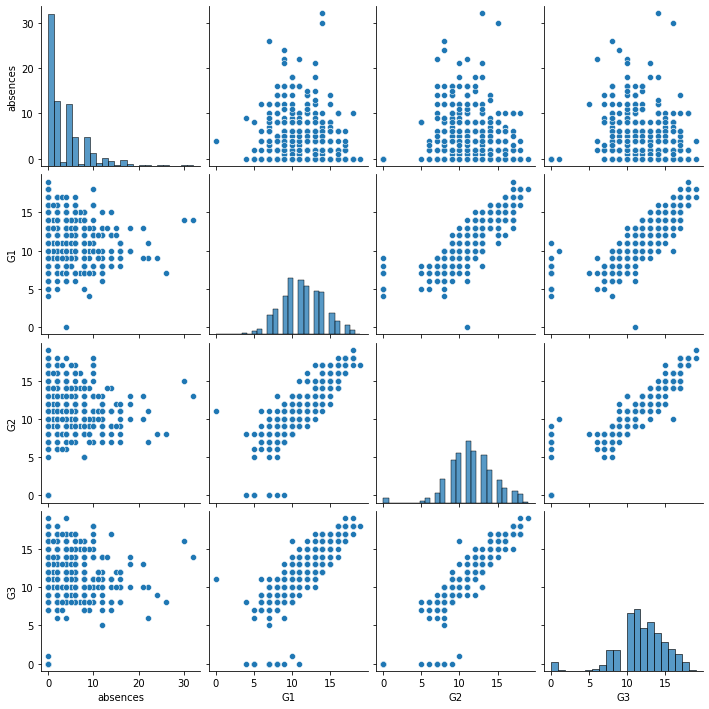

In [18]:
# Pairwise distributions
df_pairplot = df[['absences', 'G1', 'G2', 'G3']]
sns.pairplot(df_pairplot)
# Adjust X and Y-Axies (if required)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Show figure
plt.show()

#### Absenses and Grades

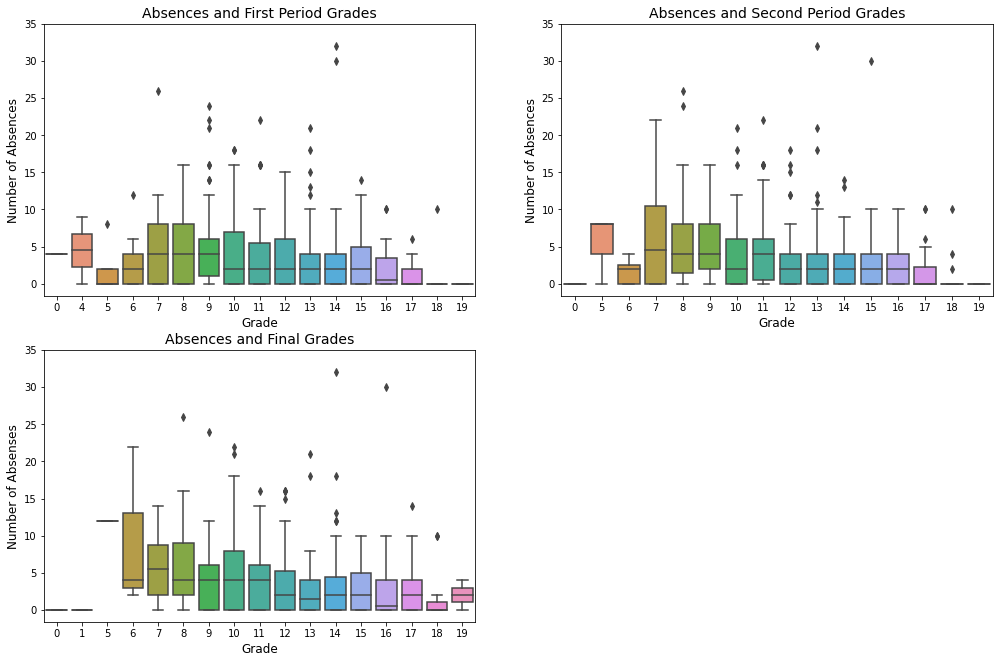

In [19]:
# Define subplot
absences_and_grades = plt.figure(figsize=(17, 11))

# First period grades
ax1 = absences_and_grades.add_subplot(2, 2, 1)
ax1 = sns.boxplot(x=df['G1'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Absences and First Period Grades', fontsize=14)

# Second period grades
ax2 = absences_and_grades.add_subplot(2, 2, 2)
ax2 = sns.boxplot(x=df['G2'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absences', fontsize=12)
plt.title('Absences and Second Period Grades', fontsize=14)

# Final grades
ax3 = absences_and_grades.add_subplot(2, 2, 3)
ax3 = sns.boxplot(x=df['G3'], y=df['absences'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 40, 5))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Absenses', fontsize=12)
plt.title('Absences and Final Grades', fontsize=14)

# Show subplot
plt.show()

#### Grades Distribution

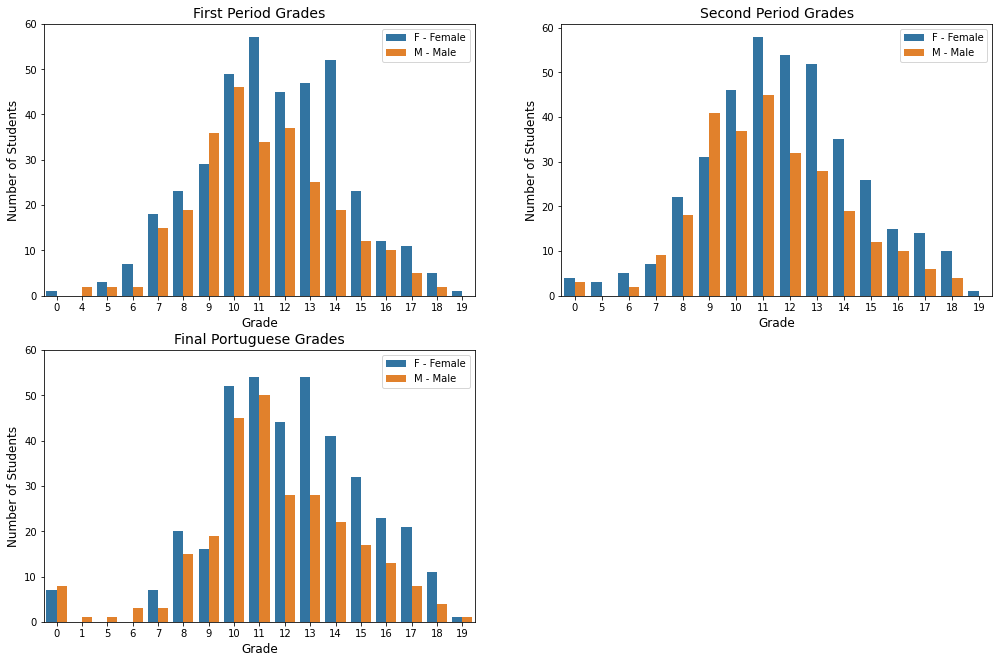

In [20]:
# Define subplot
por_grades = plt.figure(figsize=(17, 11))

# First period grades
ax1 = por_grades.add_subplot(2, 2, 1)
ax1 = sns.countplot(x=df['G1'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 70, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('First Period Grades', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Second period grades
ax2 = por_grades.add_subplot(2, 2, 2)
ax2 = sns.countplot(x=df['G2'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 70, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Second Period Grades', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Final grades
ax3 = por_grades.add_subplot(2, 2, 3)
ax3 = sns.countplot(x=df['G3'], hue=df['sex'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 70, 10))
# Plot title and labels
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.title('Final Portuguese Grades', fontsize=14)
# Plot legend
plt.legend(labels=gender_labels, loc='upper right')

# Show subplot
plt.show()

#### Correlation Map

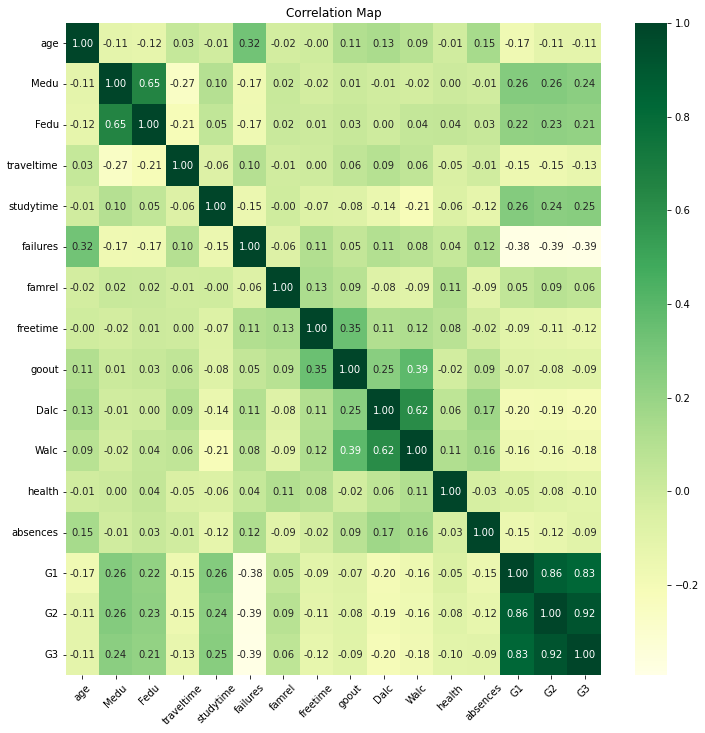

In [21]:
# Define correlation map figure
plt.figure(figsize=(12,12))

# Correlation Map
sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")
# Adjust X and Y-Axes (if required)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [22]:
# Label Encode Columns, Indices: 0-1, 3-5, 15-22
le = LabelEncoder()
le_columns = [0, 1, 3, 4, 5, 8, 9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22]

# Apply Label Encoding 
for i in le_columns:
  X[:, i] = le.fit_transform(X[:, i])

print(X)

[[0 0 18 ... 4 0 11]
 [0 0 17 ... 2 9 11]
 [0 0 15 ... 6 12 13]
 ...
 [1 0 18 ... 6 11 12]
 [1 1 17 ... 6 10 10]
 [1 1 18 ... 4 10 11]]


In [23]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [24]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 5. Define and Evalutate Models

In [25]:
# Linear Regression (LR)
from sklearn.linear_model import LinearRegression
# Support Vector Machine - Regression (SVR)
from sklearn.svm import SVR
# Decision Tree (DT)
from sklearn.tree import DecisionTreeRegressor
# Random Forest (RF)
from sklearn.ensemble import RandomForestRegressor
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBRegressor
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#### **Important Functions**

In [26]:
# Summarize prediction results
def summarize_results(model):
  """
  model - Summarize results for Machine Learning model
  """

  # Mean Absolute Error (MAE)
  print('MAE: %.3f' % (mean_absolute_error(y_test, model)))
  # Mean Squared Error (MSE)
  print('MSE: %.3f' % (mean_squared_error(y_test, model)))
  # Root Mean Squared Error (RMSE)
  print('RMSE: %.3f' % (mean_squared_error(y_test, model, squared=False)))
  # R^2 Score (Goodness-of-Fit)
  print('R^2 Score: %.3f' % (r2_score(y_test, model)))

In [27]:
# Plot prediction and validation distributions
def plot_dist(model, colour, a, x_range, y_range):
  """
  model   - Machine Learning model implemented
  colour  - Colour for predictions
  a       - Colour adjustment for predictions (alpha)
  x_range - X-Axis range of values
  y_range - Y-Axis range of values
  """
  
  # Define subplot figure
  fig = plt.figure(figsize=(15, 12))

  # Histogram for predicted model
  ax1 = fig.add_subplot(2, 2, 1)
  ax1 = plt.hist(x=model, facecolor=colour, alpha=a, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.ylabel('Number of Students', fontsize=12)
  plt.title('Predicted Grade Distribution', fontsize=14)

  # Histogram for y_test
  ax2 = fig.add_subplot(2, 2, 2)
  ax2 = plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.ylabel('Number of Students', fontsize=12)
  plt.title('Validation Grade Distribution', fontsize=14)

  # Box plot for predicted model
  ax3 = fig.add_subplot(2, 2, 3)
  ax3 = sns.boxplot(x=model, color=colour)
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.title('Predicted Grade Distribution', fontsize=14)

  # Box plot for y_test
  ax4 = fig.add_subplot(2, 2, 4)
  ax4 = sns.boxplot(x=y_test, color='orange')
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Grade', fontsize=12)
  plt.title('Validation Grade Distribution', fontsize=14)

  # Return figure to show
  return fig

In [28]:
# Plot results trends
def pred_results(model, pred, y_range, train_window, test_window, 
                 train_legend_loc, test_legend_loc):
  """
  model            - Machine Learning model implemented
  pred             - Model predictions
  y_range          - Y-Axis range of values
  train_window     - Extra space for legend (training set)
  test_window      - Extra space for legend (test set)
  train_legend_loc - Legend location for training set prediction trends
  test_legend_loc  - Legend location for test set prediction trends
  """

  # Define subplot
  results_fig = plt.figure(figsize=(16, 12))

  # Training set plot
  ax1 = results_fig.add_subplot(2, 1, 1)
  plt.plot(y_train, color = 'red', label = 'Training Set')
  plt.plot(model.predict(X_train), color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(X_train)+train_window, 25))
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Number of Students', fontsize=12)
  plt.ylabel('Grade', fontsize=12)
  plt.title('Predicted Final Grades', fontsize=14)
  # Legend and grid
  plt.legend(loc=train_legend_loc)
  plt.grid()

  # Test set plot
  ax2 = results_fig.add_subplot(2, 1, 2)
  plt.plot(y_test, color = 'red', label = 'Test Set')
  plt.plot(pred, color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(y_test)+test_window, test_window))
  plt.yticks(y_range)
  # Plot title and labels
  plt.xlabel('Number of Students', fontsize=12)
  plt.ylabel('Grade', fontsize=12)
  plt.title('Validation Final Grades', fontsize=14)
  # Legend and grid
  plt.legend(loc=test_legend_loc)
  plt.grid()

  # Return figure to show
  return results_fig

In [29]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """
  
  # Lists of values
  r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
  rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
  # Cross validate for n k-folds
  # RepeatedStratifiedKFold - 3 repeats for each k-Fold
  for i in range(2, 2+n):
    cv = RepeatedStratifiedKFold(n_splits = i, n_repeats = 3, random_state = 0)
    # Collect appropriate Key Performance Indicator (KPI) results per k-Fold
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    # mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    
    # Force scores to be positive
    r2_scores = abs(r2_scores)
    rmse_scores = abs(rmse_scores)

    # Print R^2 scores
    print('')
    print('-- Fold: %d --' % (i-1))
    print('')
    print('R^2 Scoring:')
    print("Mean: %f" % (np.mean(r2_scores)))
    print("Std: +/- %f" % (np.std(r2_scores)))
    print("Min: %f" % (np.min(r2_scores)))
    print("Max: %f" % (np.max(r2_scores)))
    
    # Print RMSE scores
    print('')
    print('RMSE Scoring:')
    print("Mean: %f" % (np.mean(rmse_scores)))
    print("Std: +/- %f" % (np.std(rmse_scores)))
    print("Min: %f" % (np.min(rmse_scores)))
    print("Max: %f" % (np.max(rmse_scores)))
    print('')
    
    # Append R^2 scores
    r2_means.append(np.mean(r2_scores))
    r2_stds.append(np.std(r2_scores))
    r2_mins.append(np.min(r2_scores))
    r2_maxs.append(np.max(r2_scores))

    # Append RMSE scores
    rmse_means.append(np.mean(rmse_scores))
    rmse_stds.append(np.std(rmse_scores))
    rmse_mins.append(np.min(rmse_scores))
    rmse_maxs.append(np.max(rmse_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(15, 10))

  # Plot R^2 scores per k-fold:
  ax1 = k_fold_results.add_subplot(2, 2, 1)
  ax1.plot(np.arange(1,1+n), r2_means, color='red', label='Mean')
  ax1.plot(np.arange(1,1+n), r2_mins, color='green', label='Min')
  ax1.plot(np.arange(1,1+n), r2_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax1.set_xlabel('k-Fold', fontsize=12)
  ax1.set_ylabel('R^2 Score', fontsize=12)
  ax1.set_title('R^2 Score per k-Fold', fontsize=14)
  # Legend and grid
  ax1.legend()
  ax1.grid(True)

  # Plot R^2 Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(2, 2, 2)
  ax2.plot(np.arange(1,1+n), r2_stds, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax2.set_xlabel('k-Fold', fontsize=12)
  ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax2.grid(True)

  # Plot RMSE scores per k-fold:
  ax3 = k_fold_results.add_subplot(2, 2, 3)
  ax3.plot(np.arange(1,1+n), rmse_means, color='orangered', label='Mean')
  ax3.plot(np.arange(1,1+n), rmse_mins, color='green', label='Min')
  ax3.plot(np.arange(1,1+n), rmse_maxs, color='blue', label='Max')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax3.set_xlabel('k-Fold', fontsize=12)
  ax3.set_ylabel('RMSE Score', fontsize=12)
  ax3.set_title('RMSE Score per k-Fold', fontsize=14)
  # Legend and grid
  ax3.legend()
  ax3.grid(True)

  # Plot RMSE Standard Deviations per k-fold:
  ax4 = k_fold_results.add_subplot(2, 2, 4)
  ax4.plot(np.arange(1,1+n), rmse_stds, color='orangered')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax4.set_xlabel('k-Fold', fontsize=12)
  ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax4.grid(True)

  # Show subplot
  plt.show()

  # Return cv for Grid Searching hyperparameter tuning (optimization)
  return cv

### Linear Regression (LR)

In [30]:
# Define LR model
lr_reg = LinearRegression()

# Train LR model
lr_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(lr_pred)

MAE: 0.866
MSE: 1.290
RMSE: 1.136
R^2 Score: 0.818


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.866</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.290</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.818</td>
    </tr>
  </tbody>
</table>

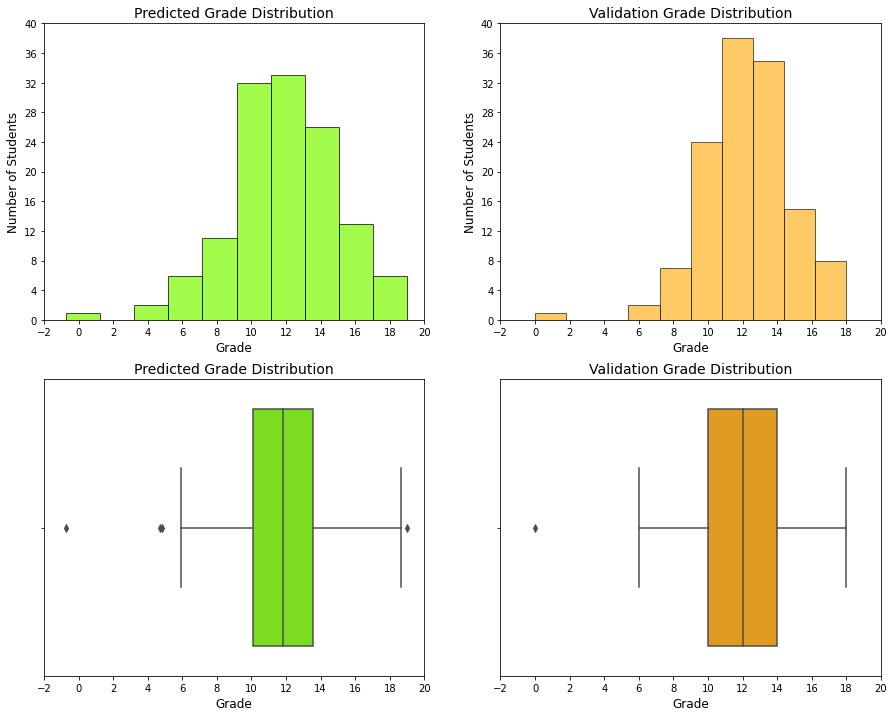

In [32]:
# Display LR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lr_dist = plot_dist(lr_pred, 'lawngreen', 0.7, np.arange(-2, 22, 2), 
                    np.arange(0, 44, 4))

# Show subplot
plt.show()

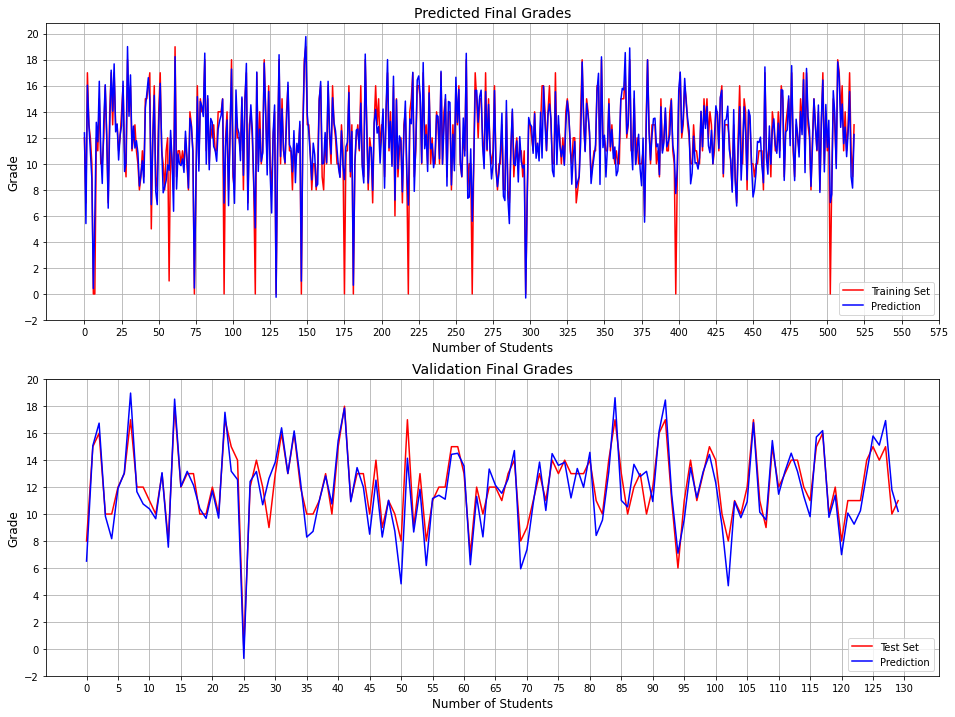

In [33]:
# Display LR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lr_results = pred_results(lr_reg, lr_pred, np.arange(-2, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 1 --

R^2 Scoring:
Mean: 0.826177
Std: +/- 0.030063
Min: 0.770537
Max: 0.867234

RMSE Scoring:
Mean: 1.392709
Std: +/- 0.123960
Min: 1.210498
Max: 1.619627


-- Fold: 2 --

R^2 Scoring:
Mean: 0.823983
Std: +/- 0.031289
Min: 0.768562
Max: 0.872144

RMSE Scoring:
Mean: 1.400071
Std: +/- 0.119009
Min: 1.209492
Max: 1.588755



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 3 --

R^2 Scoring:
Mean: 0.826043
Std: +/- 0.046287
Min: 0.734559
Max: 0.881189

RMSE Scoring:
Mean: 1.385218
Std: +/- 0.187763
Min: 1.117102
Max: 1.719244


-- Fold: 4 --

R^2 Scoring:
Mean: 0.829279
Std: +/- 0.034655
Min: 0.775353
Max: 0.887788

RMSE Scoring:
Mean: 1.377938
Std: +/- 0.153307
Min: 1.113353
Max: 1.625289



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 5 --

R^2 Scoring:
Mean: 0.831000
Std: +/- 0.061069
Min: 0.716445
Max: 0.941974

RMSE Scoring:
Mean: 1.354857
Std: +/- 0.266837
Min: 0.789646
Max: 1.809290


-- Fold: 6 --

R^2 Scoring:
Mean: 0.830868
Std: +/- 0.065597
Min: 0.640139
Max: 0.946243

RMSE Scoring:
Mean: 1.352172
Std: +/- 0.277290
Min: 0.774975
Max: 2.077618



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 7 --

R^2 Scoring:
Mean: 0.833451
Std: +/- 0.062356
Min: 0.707300
Max: 0.950652

RMSE Scoring:
Mean: 1.341637
Std: +/- 0.299386
Min: 0.748839
Max: 1.918976



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 8 --

R^2 Scoring:
Mean: 0.833542
Std: +/- 0.064722
Min: 0.702054
Max: 0.947419

RMSE Scoring:
Mean: 1.340389
Std: +/- 0.301980
Min: 0.801793
Max: 2.001802



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 9 --

R^2 Scoring:
Mean: 0.838431
Std: +/- 0.066380
Min: 0.688968
Max: 0.945377

RMSE Scoring:
Mean: 1.321746
Std: +/- 0.355901
Min: 0.710123
Max: 2.164442



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 10 --

R^2 Scoring:
Mean: 0.833946
Std: +/- 0.066055
Min: 0.720327
Max: 0.949906

RMSE Scoring:
Mean: 1.334244
Std: +/- 0.301829
Min: 0.732412
Max: 1.843822



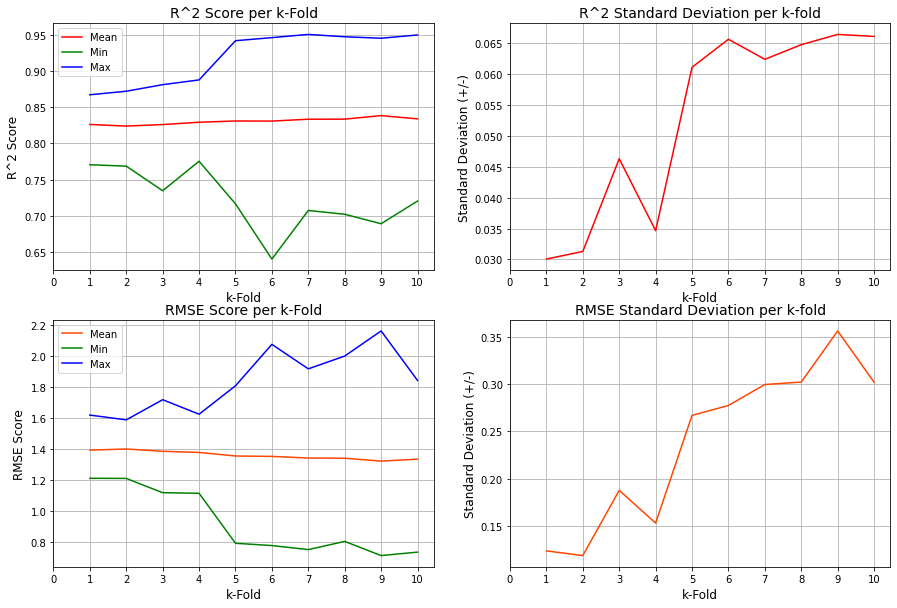

In [34]:
# Linear Regression - k-Fold Cross Validation
lr_cv = k_fold(lr_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.834</td>
      <td>1.334</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.066</td>
      <td>0.302</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.720</td>
      <td>0.732</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.950</td>
      <td>1.844</td>
    </tr>
  </tbody>
</table>

### Linear Support Vector Regression (SVR)

In [35]:
# Define Linear SVR model
linear_svr = SVR(kernel='linear', C=0.99, epsilon=0.098)

# Train Linear SVR model
linear_svr.fit(X_train, y_train)

SVR(C=0.99, epsilon=0.098, kernel='linear')

In [36]:
# Predict test set results
linear_svr_pred = linear_svr.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((linear_svr_pred.reshape(len(linear_svr_pred), 1), 
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(linear_svr_pred)

MAE: 0.736
MSE: 0.982
RMSE: 0.991
R^2 Score: 0.862


<table border = "1">
  <thead>
    <th colspan = "5">Linear SVR Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.736</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.982</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.991</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.862</td>
    </tr>
  </tbody>
</table>

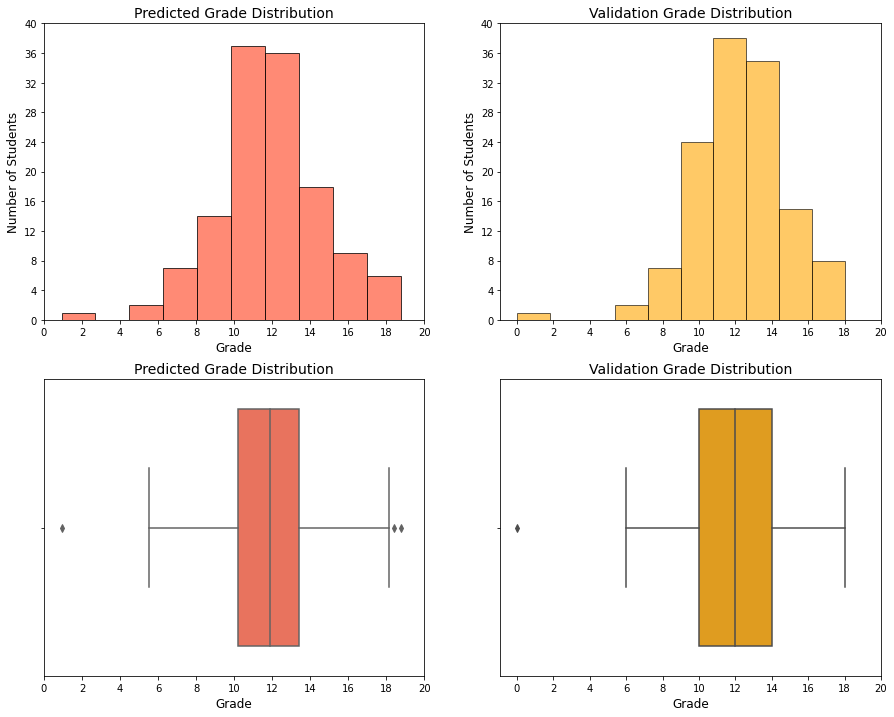

In [37]:
# Display Linear SVR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lsvr_dist = plot_dist(linear_svr_pred, 'tomato', 0.75, np.arange(0, 22, 2), 
                    np.arange(0, 44, 4))

# Show subplot
plt.show()

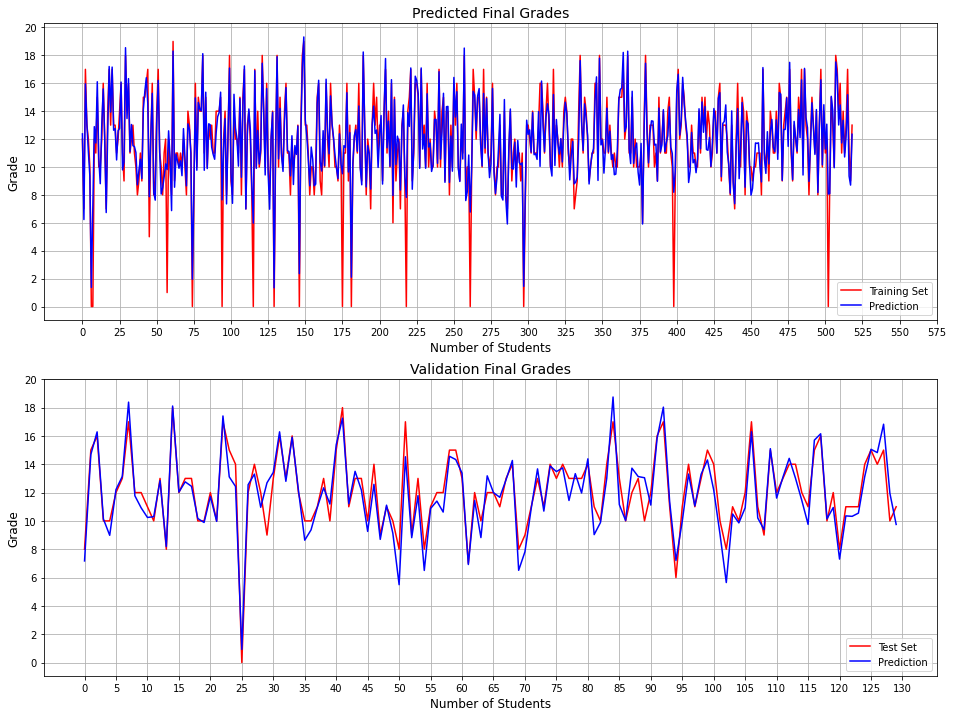

In [38]:
# Display Linear SVR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lsvr_results = pred_results(linear_svr, linear_svr_pred, np.arange(0, 22, 2), 75, 
                            5, "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 1 --

R^2 Scoring:
Mean: 0.828596
Std: +/- 0.031073
Min: 0.773951
Max: 0.879047

RMSE Scoring:
Mean: 1.382328
Std: +/- 0.131949
Min: 1.155393
Max: 1.607532



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 2 --

R^2 Scoring:
Mean: 0.829015
Std: +/- 0.031209
Min: 0.788454
Max: 0.878108

RMSE Scoring:
Mean: 1.379550
Std: +/- 0.122744
Min: 1.180947
Max: 1.518945



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 3 --

R^2 Scoring:
Mean: 0.829426
Std: +/- 0.044440
Min: 0.751021
Max: 0.895384

RMSE Scoring:
Mean: 1.372417
Std: +/- 0.186813
Min: 1.048244
Max: 1.675669



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 4 --

R^2 Scoring:
Mean: 0.831713
Std: +/- 0.034883
Min: 0.777915
Max: 0.884849

RMSE Scoring:
Mean: 1.367735
Std: +/- 0.155462
Min: 1.127838
Max: 1.603101



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 5 --

R^2 Scoring:
Mean: 0.830333
Std: +/- 0.056642
Min: 0.730271
Max: 0.937133

RMSE Scoring:
Mean: 1.361171
Std: +/- 0.253621
Min: 0.821929
Max: 1.772979



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 6 --

R^2 Scoring:
Mean: 0.832761
Std: +/- 0.061847
Min: 0.665835
Max: 0.938139

RMSE Scoring:
Mean: 1.346429
Std: +/- 0.263720
Min: 0.840299
Max: 2.002066



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 7 --

R^2 Scoring:
Mean: 0.833855
Std: +/- 0.063240
Min: 0.708719
Max: 0.943439

RMSE Scoring:
Mean: 1.340548
Std: +/- 0.305498
Min: 0.801695
Max: 1.932051



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 8 --

R^2 Scoring:
Mean: 0.834142
Std: +/- 0.064812
Min: 0.699430
Max: 0.943448

RMSE Scoring:
Mean: 1.338828
Std: +/- 0.309694
Min: 0.748479
Max: 2.010597



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 9 --

R^2 Scoring:
Mean: 0.837601
Std: +/- 0.068353
Min: 0.686055
Max: 0.946972

RMSE Scoring:
Mean: 1.324183
Std: +/- 0.370085
Min: 0.710393
Max: 2.174554



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 10 --

R^2 Scoring:
Mean: 0.832320
Std: +/- 0.067473
Min: 0.714101
Max: 0.942754

RMSE Scoring:
Mean: 1.340008
Std: +/- 0.314409
Min: 0.782946
Max: 1.854451



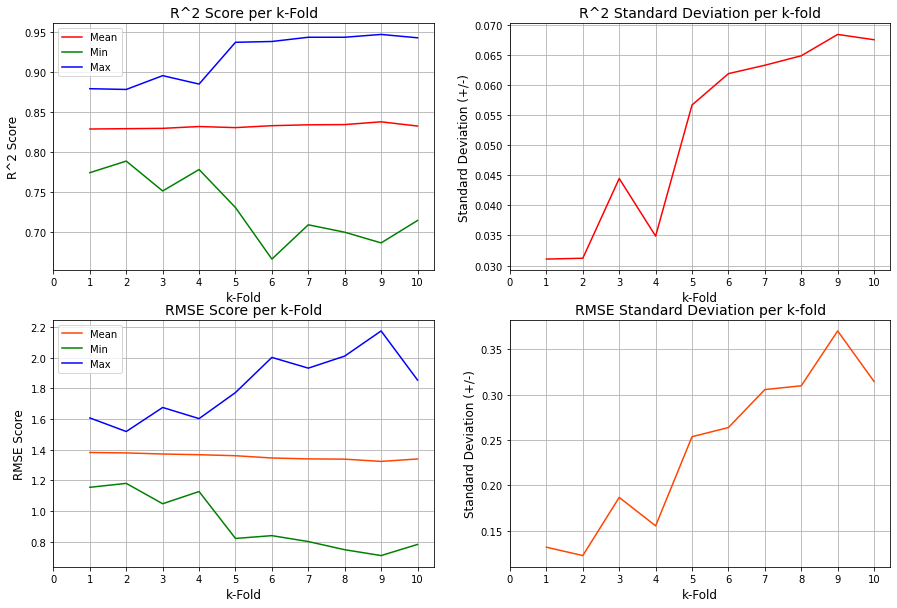

In [39]:
# Linear SVR - k-Fold Cross Validation
lsvr_cv = k_fold(linear_svr, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear SVR Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr><tr>
      <td><b>Mean</b></td>
      <td>0.832</td>
      <td>1.340</td>
    <tr>
      <td><b>Std.</b></td>
      <td>0.068</td>
      <td>0.314</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.714</td>
      <td>0.783</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.943</td>
      <td>1.855</td>
    </tr>
  </tbody>
</table>

In [40]:
# Apply Grid Search for parameter tuning

# linear_svr_params = {'C': [0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                      'kernel': ['linear'],
#                      'epsilon': [0.025, 0.05, 0.075, 0.1]}

linear_svr_params = {'C': [0.99],
                     'epsilon': [0.098],
                     'kernel': ['linear']}

# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_mean_absolute_error', cv=lsvr_cv, n_jobs=-1)
# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_mean_squared_error', cv=lsvr_cv, n_jobs=-1)
# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_root_mean_squared_error', cv=lsvr_cv, n_jobs=-1)
linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='r2', cv=lsvr_cv, n_jobs=-1)
results = linear_svr_grid.fit(X_train, y_train)

# Summarize results
best_score = linear_svr_grid.best_score_
best_parameters = linear_svr_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,


Best Score: 83.232%
Best Parameters:  {'C': 0.99, 'epsilon': 0.098, 'kernel': 'linear'}


<table border = "1">
  <thead>
    <th colspan = "2">Linear SVR Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>83.232%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>0.99</td>
    </tr>
    <tr>
      <td>epsilon</td>
      <td>0.098</td>
    </tr>
    <tr>
      <td><b>kernel</b></td>
      <td>'linear'</td>
    </tr>
  </tbody>
</table>

### Decision Tree (DT)

In [41]:
# Define DT model
dt_reg = DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=9,
                               min_samples_split=20, random_state=0)

# Train DT model
dt_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=9,
                      min_samples_split=20, random_state=0)

In [42]:
# Predict test set results
dt_pred = dt_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(dt_pred)

MAE: 0.744
MSE: 1.183
RMSE: 1.088
R^2 Score: 0.833


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.744</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.183</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.088</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.833</td>
    </tr>
  </tbody>
</table>

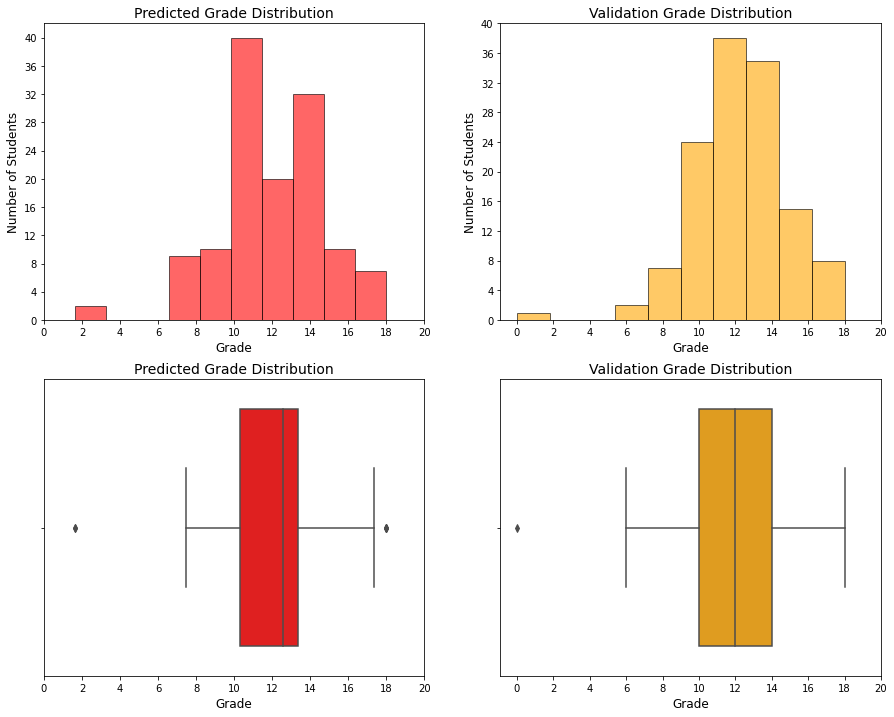

In [43]:
# Display DT prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
dt_dist = plot_dist(dt_pred, 'red', 0.6, np.arange(0, 22, 2), np.arange(0, 44, 4))

# Show subplot
plt.show()

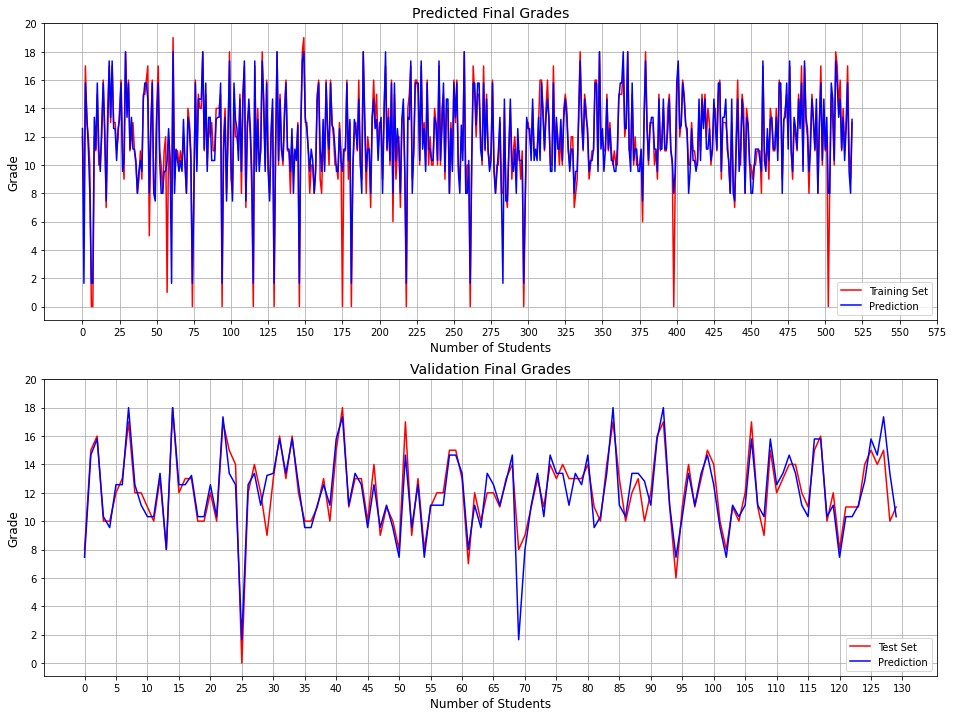

In [44]:
# Display DT training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
dt_results = pred_results(dt_reg, dt_pred, np.arange(0, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 1 --

R^2 Scoring:
Mean: 0.803564
Std: +/- 0.023586
Min: 0.771117
Max: 0.839208

RMSE Scoring:
Mean: 1.483330
Std: +/- 0.098741
Min: 1.332153
Max: 1.617578


-- Fold: 2 --

R^2 Scoring:
Mean: 0.803139
Std: +/- 0.021729
Min: 0.762300
Max: 0.835407

RMSE Scoring:
Mean: 1.484387
Std: +/- 0.073841
Min: 1.372297
Max: 1.610106



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 3 --

R^2 Scoring:
Mean: 0.800231
Std: +/- 0.054541
Min: 0.706607
Max: 0.883661

RMSE Scoring:
Mean: 1.482262
Std: +/- 0.206007
Min: 1.167027
Max: 1.838735


-- Fold: 4 --

R^2 Scoring:
Mean: 0.801439
Std: +/- 0.067368
Min: 0.677962
Max: 0.922825

RMSE Scoring:
Mean: 1.471239
Std: +/- 0.267366
Min: 0.934782
Max: 1.887785



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 5 --

R^2 Scoring:
Mean: 0.804010
Std: +/- 0.080644
Min: 0.619018
Max: 0.893184

RMSE Scoring:
Mean: 1.456958
Std: +/- 0.305539
Min: 1.114953
Max: 2.097210



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,



-- Fold: 6 --

R^2 Scoring:
Mean: 0.816556
Std: +/- 0.077661
Min: 0.632476
Max: 0.924941

RMSE Scoring:
Mean: 1.403737
Std: +/- 0.307959
Min: 0.915739
Max: 1.975591



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 7 --

R^2 Scoring:
Mean: 0.830918
Std: +/- 0.077318
Min: 0.581817
Max: 0.946325

RMSE Scoring:
Mean: 1.342278
Std: +/- 0.344992
Min: 0.804092
Max: 2.324993



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selec


-- Fold: 8 --

R^2 Scoring:
Mean: 0.827052
Std: +/- 0.086490
Min: 0.618966
Max: 0.939037

RMSE Scoring:
Mean: 1.352668
Std: +/- 0.378462
Min: 0.777122
Max: 2.185265



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 9 --

R^2 Scoring:
Mean: 0.832124
Std: +/- 0.086397
Min: 0.589549
Max: 0.929158

RMSE Scoring:
Mean: 1.337023
Std: +/- 0.398315
Min: 0.808708
Max: 2.486416



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,



-- Fold: 10 --

R^2 Scoring:
Mean: 0.842260
Std: +/- 0.090819
Min: 0.664683
Max: 0.956773

RMSE Scoring:
Mean: 1.273544
Std: +/- 0.402307
Min: 0.747239
Max: 1.958928



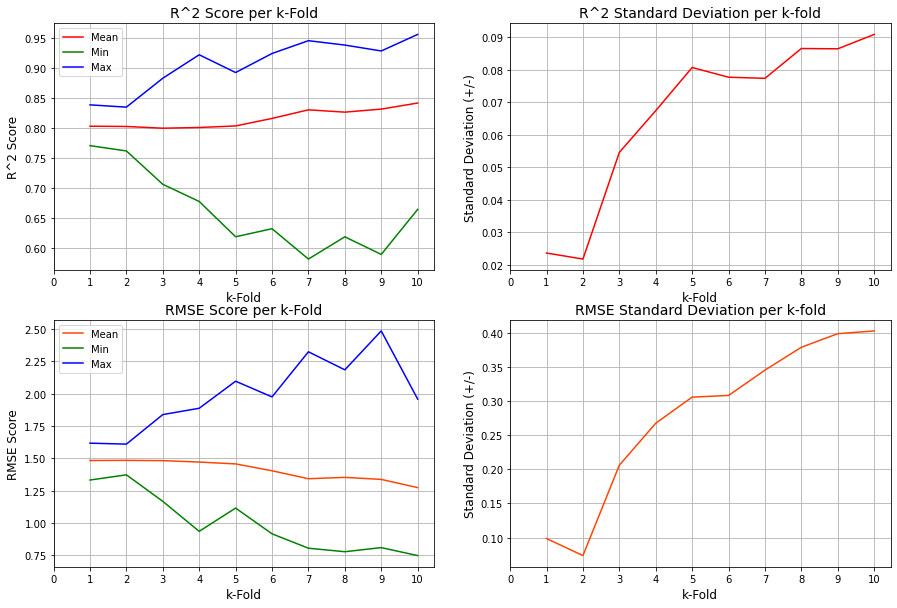

In [45]:
# Decision Tree - k-Fold Cross Validation
dt_cv = k_fold(dt_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Decision Tree Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.842</td>
      <td>1.274</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.091</td>
      <td>0.402</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.665</td>
      <td>0.747</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.957</td>
      <td>1.959</td>
    </tr>
  </tbody>
</table>

In [46]:
# Apply Grid Search for parameter tuning

# dt_params = {'criterion': ['mse', 'mae'],
#              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_leaf': [2, 5, 10],
#              'min_samples_split': [2, 5, 10],
#              'random_state': [0]}

dt_params = {'criterion': ['mse'],
            'max_depth': [4],
            'min_samples_leaf': [9],
            'min_samples_split': [20],
            'random_state': [0]}

# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_absolute_error', cv=dt_cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_mean_squared_error', cv=dt_cv, n_jobs=-1)
# dt_grid = GridSearchCV(dt_reg, dt_params, scoring='neg_root_mean_squared_error', cv=dt_cv, n_jobs=-1)
dt_grid = GridSearchCV(dt_reg, dt_params, scoring='r2', cv=dt_cv, n_jobs=-1)
results = dt_grid.fit(X_train, y_train)

# Summarize results
best_score = dt_grid.best_score_
best_parameters = dt_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 84.226%
Best Parameters:  {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 20, 'random_state': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


<table border = "1">
  <thead>
    <th colspan = "2">Decision Tree Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>84.226%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>min_samples_split</b></td>
      <td>20</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Random Forest (RF)

In [47]:
# Define RF model
rf_reg = RandomForestRegressor(criterion='mse', max_depth=4, min_samples_split=2,
                            min_samples_leaf=3, n_estimators=53, random_state=0)

# Train RF model
rf_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', max_depth=4, min_samples_leaf=3,
                      n_estimators=53, random_state=0)

In [48]:
# Predict test set results
rf_pred = rf_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((rf_pred.reshape(len(rf_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(rf_pred)

MAE: 0.760
MSE: 1.192
RMSE: 1.092
R^2 Score: 0.832


<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.760</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.192</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.092</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.832</td>
    </tr>
  </tbody>
</table>

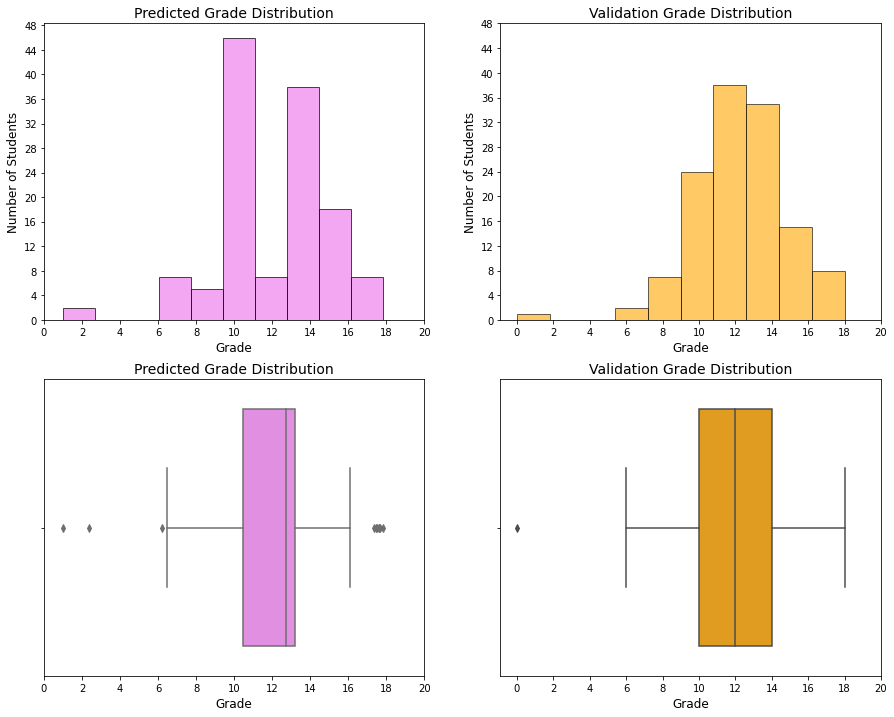

In [49]:
# Display RF prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
rf_dist = plot_dist(rf_pred, 'violet', 0.7, np.arange(0, 22, 2), np.arange(0, 52, 4))

# Show subplot
plt.show()

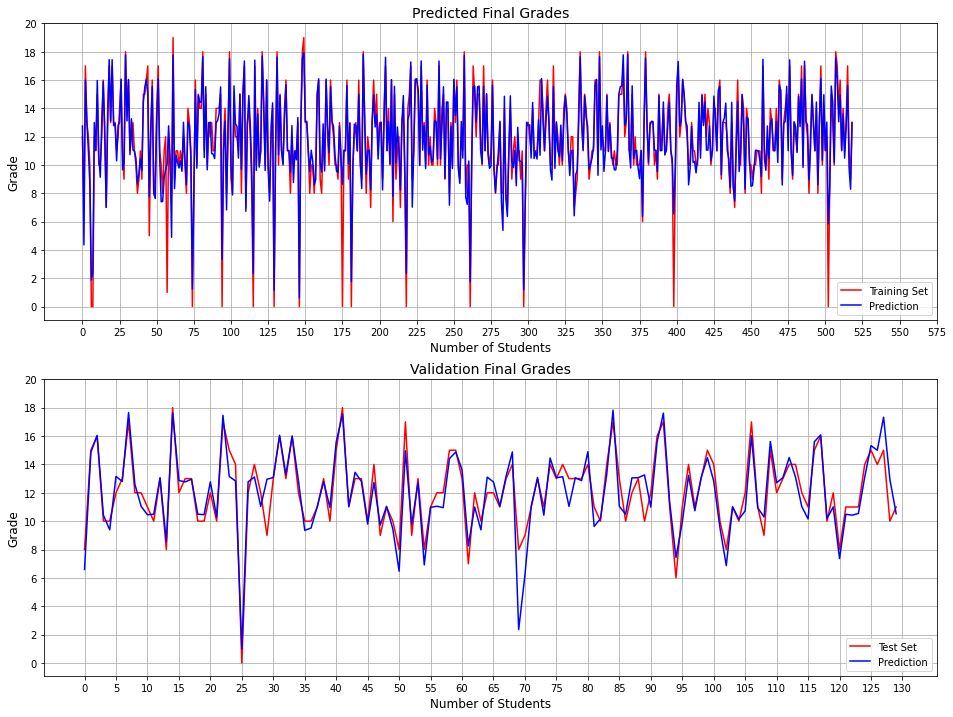

In [50]:
# Display RF training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
rf_results = pred_results(rf_reg, rf_pred, np.arange(0, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 1 --

R^2 Scoring:
Mean: 0.839899
Std: +/- 0.026885
Min: 0.794059
Max: 0.871789

RMSE Scoring:
Mean: 1.337000
Std: +/- 0.118251
Min: 1.189552
Max: 1.534372



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 2 --

R^2 Scoring:
Mean: 0.837350
Std: +/- 0.020425
Min: 0.803957
Max: 0.867969

RMSE Scoring:
Mean: 1.348536
Std: +/- 0.078138
Min: 1.224505
Max: 1.462230



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 3 --

R^2 Scoring:
Mean: 0.843124
Std: +/- 0.046763
Min: 0.749510
Max: 0.899453

RMSE Scoring:
Mean: 1.312713
Std: +/- 0.199629
Min: 1.076411
Max: 1.670125



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 4 --

R^2 Scoring:
Mean: 0.844455
Std: +/- 0.048244
Min: 0.723031
Max: 0.903068

RMSE Scoring:
Mean: 1.307325
Std: +/- 0.204226
Min: 1.034774
Max: 1.750713



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 5 --

R^2 Scoring:
Mean: 0.844011
Std: +/- 0.063060
Min: 0.718540
Max: 0.936305

RMSE Scoring:
Mean: 1.298257
Std: +/- 0.276981
Min: 0.827325
Max: 1.802596



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 6 --

R^2 Scoring:
Mean: 0.841571
Std: +/- 0.074124
Min: 0.642298
Max: 0.938298

RMSE Scoring:
Mean: 1.301095
Std: +/- 0.301096
Min: 0.830272
Max: 1.949014



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 7 --

R^2 Scoring:
Mean: 0.848381
Std: +/- 0.067867
Min: 0.638206
Max: 0.943132

RMSE Scoring:
Mean: 1.275752
Std: +/- 0.317659
Min: 0.803872
Max: 2.162565



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 8 --

R^2 Scoring:
Mean: 0.846421
Std: +/- 0.071389
Min: 0.671594
Max: 0.939778

RMSE Scoring:
Mean: 1.278826
Std: +/- 0.316696
Min: 0.777581
Max: 2.028748



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 9 --

R^2 Scoring:
Mean: 0.849519
Std: +/- 0.069187
Min: 0.641613
Max: 0.940849

RMSE Scoring:
Mean: 1.275059
Std: +/- 0.366183
Min: 0.738968
Max: 2.323374



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 10 --

R^2 Scoring:
Mean: 0.842064
Std: +/- 0.076959
Min: 0.703620
Max: 0.949495

RMSE Scoring:
Mean: 1.291048
Std: +/- 0.339541
Min: 0.735410
Max: 1.945723



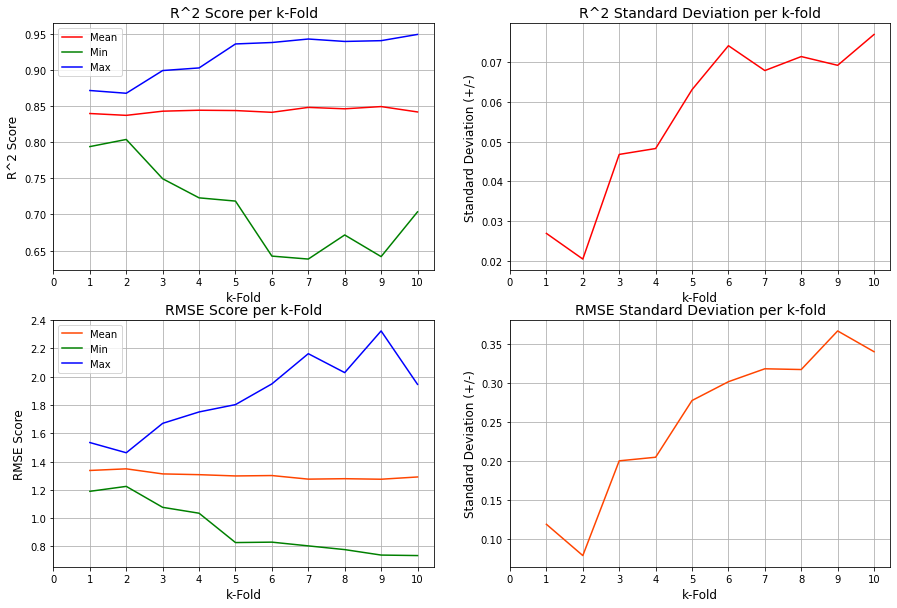

In [51]:
# Random Forest - k-Fold Cross Validation
rf_cv = k_fold(rf_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Random Forest Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.842</td>
      <td>1.291</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.077</td>
      <td>0.340</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.704</td>
      <td>0.735</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.950</td>
      <td>1.946</td>
    </tr>
  </tbody>
</table>

In [52]:
# Apply Grid Search for parameter tuning

# rf_params = {'n_estimators': [50, 100, 150, 200, 250],
#              'criterion': ['mse', 'mae'],
#              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#              'min_samples_leaf': [2, 5, 10],
#              'min_samples_split': [2, 5, 10],
#              'random_state': [0, 1, 2]}

rf_params = {'criterion': ['mse'],
             'max_depth': [4],
             'min_samples_split': [2],
             'min_samples_leaf': [3],
             'n_estimators': [53],
             'random_state': [0]}

# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_absolute_error', cv=rf_cv, n_jobs=-1)
# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_mean_squared_error', cv=rf_cv, n_jobs=-1)
# rf_grid = GridSearchCV(rf_reg, rf_params, scoring='neg_root_mean_squared_error', cv=rf_cv, n_jobs=-1)
rf_grid = GridSearchCV(rf_reg, rf_params, scoring='r2', cv=rf_cv, n_jobs=-1)
results = rf_grid.fit(X_train, y_train)

# Summarize results
best_score = rf_grid.best_score_
best_parameters = rf_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,


Best Score: 84.206%
Best Parameters:  {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 53, 'random_state': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


<table border = "1">
  <thead>
    <th colspan = "2">Random Forest Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>84.206%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>criterion</b></td>
      <td>'mse'</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>min_samples_leaf</b></td>
      <td>3</td>
    </tr>
    <tr>min_samples_leaf
      <td><b>min_samples_split</b></td>
      <td>2</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>53</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### XGBoost (XGB)

In [53]:
# Define XGB model
xgb_reg = XGBRegressor(max_depth=3, min_child_weight=9, gamma=0.07, subsample=1.0, 
                   colsample_bytree=0.66, reg_alpha=5, n_estimators=44,
                   learning_rate=0.13, random_state=0)

# Train XGB model
xgb_reg.fit(X_train, y_train)

[21:36:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.66, gamma=0.07, learning_rate=0.13,
             min_child_weight=9, n_estimators=44, reg_alpha=5, subsample=1.0)

In [54]:
# Predict test set results
xgb_pred = xgb_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(xgb_pred)

MAE: 0.796
MSE: 1.177
RMSE: 1.085
R^2 Score: 0.834


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.796</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>1.177</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>1.085</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.834</td>
    </tr>
  </tbody>
</table>

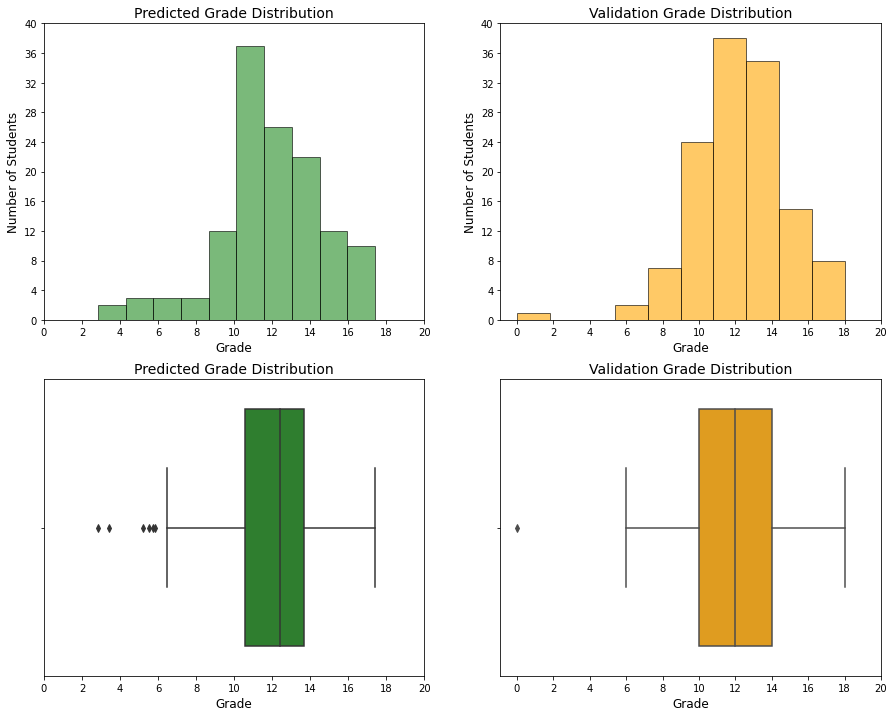

In [55]:
# Display XGB prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
xgb_dist = plot_dist(xgb_pred, 'forestgreen', 0.6, np.arange(0, 22, 2), 
                     np.arange(0, 44, 4))

# Show subplot
plt.show()

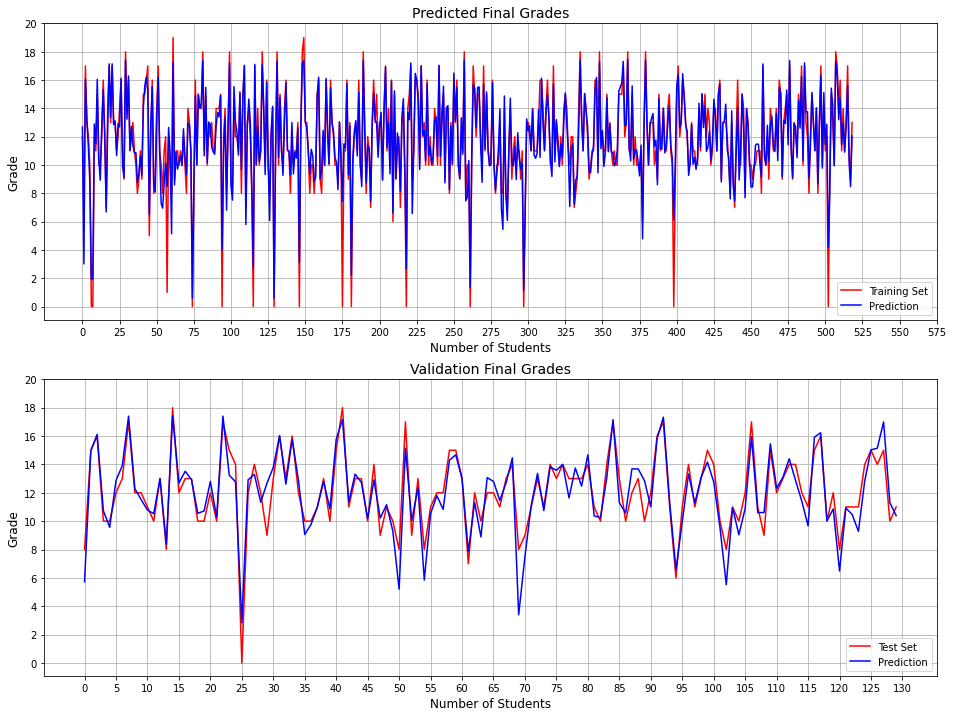

In [56]:
# Display XGB training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
xgb_results = pred_results(xgb_reg, xgb_pred, np.arange(0, 22, 2), 75, 5, 
                          "lower right", "lower right")

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 1 --

R^2 Scoring:
Mean: 0.823517
Std: +/- 0.018521
Min: 0.801259
Max: 0.854821

RMSE Scoring:
Mean: 1.406354
Std: +/- 0.081710
Min: 1.265823
Max: 1.507311



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 2 --

R^2 Scoring:
Mean: 0.833101
Std: +/- 0.023912
Min: 0.772061
Max: 0.858982

RMSE Scoring:
Mean: 1.365475
Std: +/- 0.085246
Min: 1.270224
Max: 1.576699



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  UserWarning,



-- Fold: 3 --

R^2 Scoring:
Mean: 0.840052
Std: +/- 0.043293
Min: 0.759680
Max: 0.905487

RMSE Scoring:
Mean: 1.327744
Std: +/- 0.185393
Min: 1.043612
Max: 1.635869



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 4 --

R^2 Scoring:
Mean: 0.834498
Std: +/- 0.040894
Min: 0.759161
Max: 0.898281

RMSE Scoring:
Mean: 1.352675
Std: +/- 0.167713
Min: 1.060021
Max: 1.632537



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 5 --

R^2 Scoring:
Mean: 0.841122
Std: +/- 0.063900
Min: 0.703151
Max: 0.927373

RMSE Scoring:
Mean: 1.312027
Std: +/- 0.272940
Min: 0.883425
Max: 1.851217



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 6 --

R^2 Scoring:
Mean: 0.839890
Std: +/- 0.064066
Min: 0.707606
Max: 0.930090

RMSE Scoring:
Mean: 1.315519
Std: +/- 0.268966
Min: 0.883771
Max: 1.872759



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 7 --

R^2 Scoring:
Mean: 0.846848
Std: +/- 0.057453
Min: 0.695996
Max: 0.929913

RMSE Scoring:
Mean: 1.290391
Std: +/- 0.277911
Min: 0.892422
Max: 1.982339



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti


-- Fold: 8 --

R^2 Scoring:
Mean: 0.846446
Std: +/- 0.061203
Min: 0.720082
Max: 0.928421

RMSE Scoring:
Mean: 1.285194
Std: +/- 0.268181
Min: 0.908588
Max: 1.940296



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 9 --

R^2 Scoring:
Mean: 0.849804
Std: +/- 0.063445
Min: 0.685594
Max: 0.941627

RMSE Scoring:
Mean: 1.278600
Std: +/- 0.341614
Min: 0.734090
Max: 2.176149



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se


-- Fold: 10 --

R^2 Scoring:
Mean: 0.848988
Std: +/- 0.064960
Min: 0.715874
Max: 0.950969

RMSE Scoring:
Mean: 1.271366
Std: +/- 0.298401
Min: 0.724598
Max: 1.915750



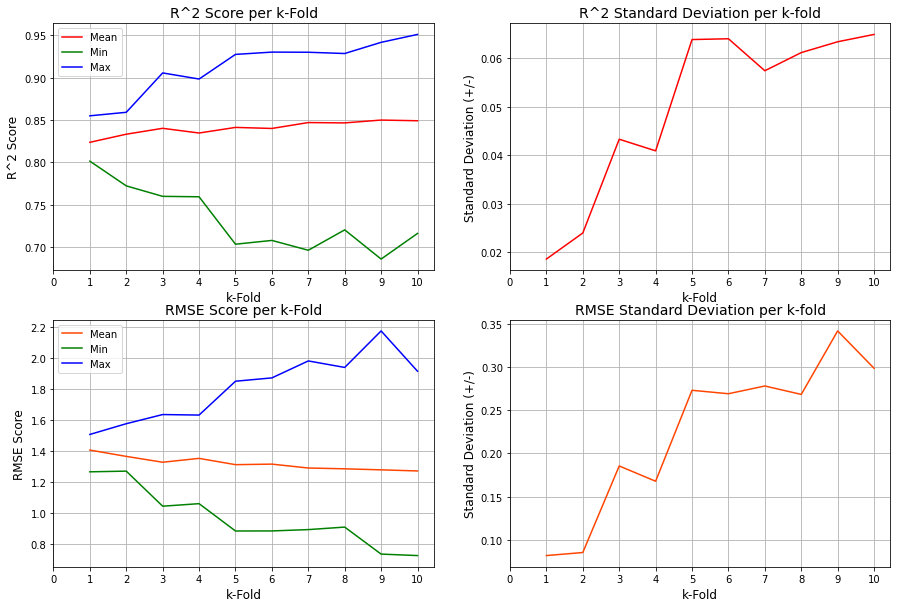

In [57]:
# XGBoost - k-Fold Cross Validation
xgb_cv = k_fold(xgb_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.849</td>
      <td>1.271</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.065</td>
      <td>0.298</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.716</td>
      <td>0.725</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.951</td>
      <td>1.916</td>
    </tr>
  </tbody>
</table>

In [58]:
# Apply Grid Search for parameter tuning

# xgb_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
#               'learning_rate': [0.05, 0.1, 0.15],
#               'colsample_bytree': [0.3, 0.5, 0.7],
#               'n_estimators': [25, 50, 75, 100, 150, 200],
#               'min_child_weight': [1, 2, 4, 5, 8, 10],
#               'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#               'gamma': [0, 0.1, 0.2, 0.3],
#               'subsample': [0.6, 0.8, 1.0],
#               'random_state': [0]}

xgb_params = {'max_depth': [3],
              'min_child_weight': [9],
              'gamma': [0.07],
              'subsample': [1],
              'colsample_bytree': [0.66],
              'reg_alpha': [5],
              'learning_rate': [.13],
              'n_estimators': [44],
              'random_state': [0]}

# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_absolute_error', cv=xgb_cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_squared_error', cv=xgb_cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_root_mean_squared_error', cv=xgb_cv, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='r2', cv=xgb_cv, n_jobs=-1)
results = xgb_grid.fit(X_train, y_train)

# Summarize results
best_score = xgb_grid.best_score_
best_parameters = xgb_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,


[21:36:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: 84.899%
Best Parameters:  {'colsample_bytree': 0.66, 'gamma': 0.07, 'learning_rate': 0.13, 'max_depth': 3, 'min_child_weight': 9, 'n_estimators': 44, 'random_state': 0, 'reg_alpha': 5, 'subsample': 1}


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>84.899%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.66</td>
    </tr>
    <tr>
      <td><b>gamma</b></td>
      <td>0.07</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.13</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>3</td>
    </tr>
    <tr>
      <td><b>min_child_weight</b></td>
      <td>9</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>44</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>50</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
    </tr>
  </tbody>
</table>

## 6. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores - Portuguese </th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan = "2"><b>R^2</b></td>
      <td colspan = "2"><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
      <td><b>CV</b></td>
      <td><b>Val.</b></td>
    </tr>
    <tr>
      <td><b>Linear Regression (LR)</b></td>
      <td>0.834</td>
      <td>0.818</td>
      <td>1.334</td>
      <td>1.136</td>
    </tr>
    <tr>
      <td><b>Linear SVR</b></td>
      <td>0.832</td>
      <td>0.862</td>
      <td>1.340</td>
      <td>0.991</td>
    </tr>
    <tr>
      <td><b>Decision Tree (DT)</b></td>
      <td>0.842</td>
      <td>0.833</td>
      <td>1.274</td>
      <td>1.088</td>
    </tr>
    <tr>
      <td><b>Random Forest (RF)</b></td>
      <td>0.842</td>
      <td>0.832</td>
      <td>1.291</td>
      <td>1.092</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>0.849</td>
      <td>0.834</td>
      <td>1.271</td>
      <td>1.085</td>
    </tr>
  </tbody>
</table>

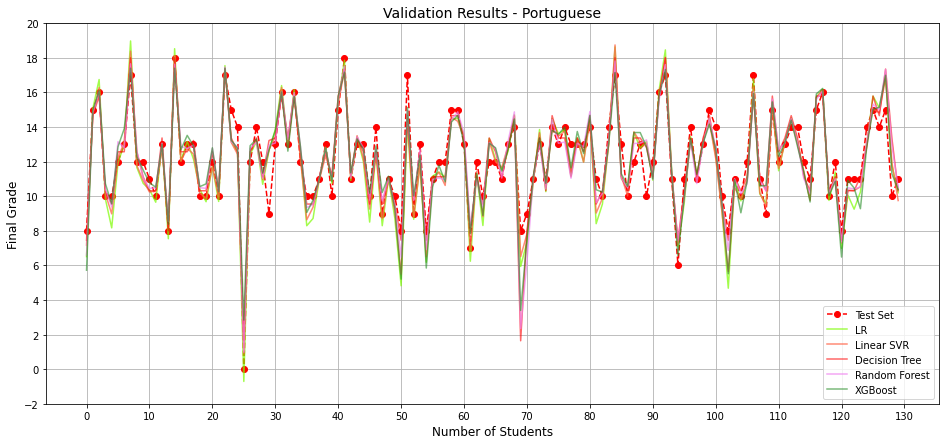

In [59]:
# Predicted vs Validation Results - Combined Distribution
overall_results = plt.figure(figsize=(16, 7))
model_labels = ['Test Set', 'LR', 'Linear SVR', 'Decision Tree', 'Random Forest', 
                'XGBoost']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# LR
overall_results = plt.plot(lr_pred, color='lawngreen', alpha=0.7)
# Linear SVR
overall_results = plt.plot(linear_svr_pred, color='tomato', alpha=0.75)
# Decision Tree
overall_results = plt.plot(dt_pred, color='red', alpha=0.6)
# Random Forest
overall_results = plt.plot(rf_pred, color='violet', alpha=0.7)
# XGBoost
overall_results = plt.plot(xgb_pred, color='forestgreen', alpha=0.6)

# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, len(y_test)+10, 10))
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Validation Results - Portuguese', fontsize=14)
# Plot legend and grid
plt.legend(labels=model_labels, loc='lower right')
plt.grid()

# Show subplot
plt.show()

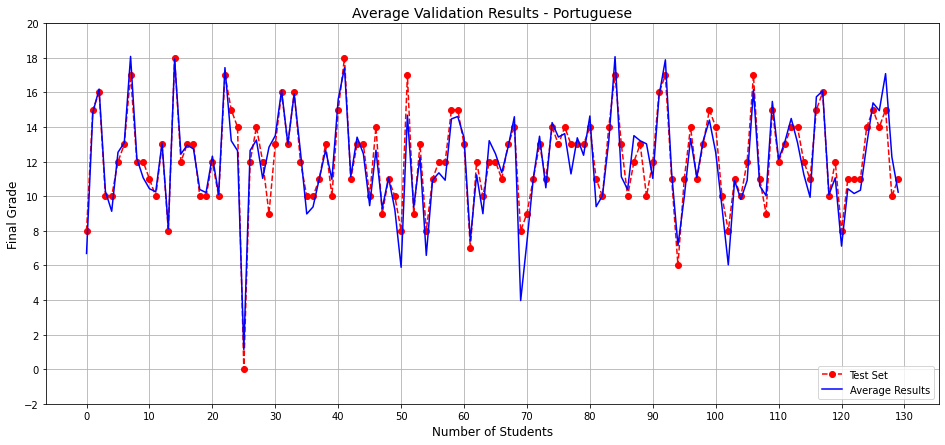

In [60]:
# Average Validation Results
average_results = plt.figure(figsize=(16, 7))
results_labels = ['Test Set', 'Average Results']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# Compute Average Results
running_avg = []
for i in range(0, len(y_test)):
  running_avg.append( (lr_pred[i] + linear_svr_pred[i] + dt_pred[i] + rf_pred[i] 
                       + xgb_pred[i])/5 )
# Plot Average Results
avg_results = plt.plot(running_avg[0:len(y_test)], color='blue')

# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, len(y_test)+10, 10))
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Average Validation Results - Portuguese', fontsize=14)
# Plot legend and grid
plt.legend(labels=results_labels, loc='lower right')
plt.grid()

# Show subplot
plt.show()

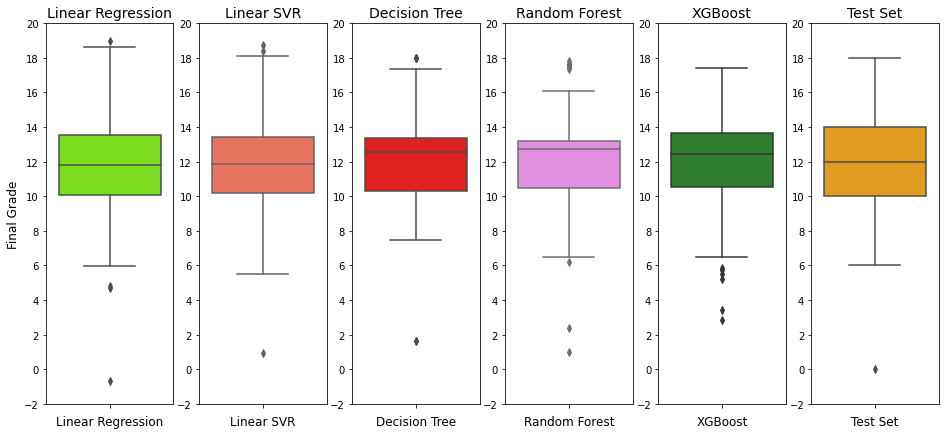

In [61]:
# Combines box plot distributions
box_plots_comb = plt.figure(figsize=(16, 7))

# Box plot for lr_pred
ax1 = box_plots_comb.add_subplot(1, 6, 1)
ax1 = sns.boxplot(y=lr_pred, color='lawngreen', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and labels
plt.xlabel('Linear Regression', fontsize=12)
plt.ylabel('Final Grade', fontsize=12)
plt.title('Linear Regression', fontsize=14)

# Box plot for linear_svr_pred
ax2 = box_plots_comb.add_subplot(1, 6, 2)
ax2 = sns.boxplot(y=linear_svr_pred, color='tomato', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Linear SVR', fontsize=12)
plt.title('Linear SVR', fontsize=14)

# Box plot for dt_pred
ax3 = box_plots_comb.add_subplot(1, 6, 3)
ax3 = sns.boxplot(y=dt_pred, color='red', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Decision Tree', fontsize=12)
plt.title('Decision Tree', fontsize=14)

# Box plot for rf_pred
ax4 = box_plots_comb.add_subplot(1, 6, 4)
ax4 = sns.boxplot(y=rf_pred, color='violet', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Random Forest', fontsize=12)
plt.title('Random Forest', fontsize=14)

# Box plot for xgb_pred
ax5 = box_plots_comb.add_subplot(1, 6, 5)
ax5 = sns.boxplot(y=xgb_pred, color='forestgreen', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('XGBoost', fontsize=12)
plt.title('XGBoost', fontsize=14)

# Box plot for y_test
ax6 = box_plots_comb.add_subplot(1, 6, 6)
ax6 = sns.boxplot(y=y_test, color='orange', orient='v')
# Adjust Y-Axis range
plt.yticks(np.arange(-2, 22, 2))
# Plot title and label
plt.xlabel('Test Set', fontsize=12)
plt.title('Test Set', fontsize=14)

# Show subplot
plt.show()